In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
os.chdir('..')
from db_connection.connection import PostgresConnection
 
from src.utils import missing_values_table, convert_bytes_to_megabytes

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [2]:
db = PostgresConnection(dbname='telecom', user='postgres', password='postgres')
db.connect()

# Example query
query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [3]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [4]:
df['x'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [5]:
print(df.dtypes)

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [26]:
#Aggregate Engagement Metrics per Customer (MSISDN)
engagement_metrics = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),                       # Count of sessions per customer
    total_session_duration=('Dur. (ms)', 'sum')                      # Total duration of sessions in milliseconds
).reset_index()

# Calculate total traffic (download + upload) after aggregation
engagement_metrics['total_traffic'] = df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum().values + \
                                      df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum().values

# Display the aggregated metrics
print(engagement_metrics.head())

   MSISDN/Number  sessions_frequency  total_session_duration  total_traffic
0   3.360100e+10                   1                116720.0   8.786906e+08
1   3.360100e+10                   1                181230.0   1.568596e+08
2   3.360100e+10                   1                134969.0   5.959665e+08
3   3.360101e+10                   1                 49878.0   4.223207e+08
4   3.360101e+10                   2                 37104.0   1.457411e+09


In [28]:
# Report the Top 10 Customers per Engagement Metric

# Top 10 Customers by Sessions Frequency
top_customers_frequency = engagement_metrics.nlargest(10, 'sessions_frequency')
print("\nTop 10 Customers by Session Frequency:\n", top_customers_frequency)



Top 10 Customers by Session Frequency:
        MSISDN/Number  sessions_frequency  total_session_duration  \
13526   3.362632e+10                  18               8791927.0   
6437    3.361489e+10                  17               9966898.0   
13180   3.362578e+10                  17              18553754.0   
37052   3.365973e+10                  16               4035428.0   
76363   3.367588e+10                  15               4865947.0   
92923   3.376054e+10                  15               9279434.0   
65118   3.366716e+10                  13               8744914.0   
666     3.360313e+10                  12               6287761.0   
1279    3.360452e+10                  12               5207990.0   
13994   3.362708e+10                  12               4703516.0   

       total_traffic  
13526   7.971167e+09  
6437    8.846226e+09  
13180   8.499621e+09  
37052   7.705863e+09  
76363   7.891111e+09  
92923   8.514774e+09  
65118   5.618394e+09  
666     4.976195e+09  
127

In [29]:
# Top 10 Customers by Total Session Duration
top_customers_duration = engagement_metrics.nlargest(10, 'total_session_duration')
print("\nTop 10 Customers by Total Session Duration:\n", top_customers_duration)



Top 10 Customers by Total Session Duration:
        MSISDN/Number  sessions_frequency  total_session_duration  \
13180   3.362578e+10                  17              18553754.0   
6437    3.361489e+10                  17               9966898.0   
92923   3.376054e+10                  15               9279434.0   
13526   3.362632e+10                  18               8791927.0   
65118   3.366716e+10                  13               8744914.0   
50281   3.366284e+10                   9               6614270.0   
57160   3.366469e+10                   9               6288730.0   
666     3.360313e+10                  12               6287761.0   
66029   3.366746e+10                   6               5649882.0   
92577   3.376041e+10                  12               5321667.0   

       total_traffic  
13180   8.499621e+09  
6437    8.846226e+09  
92923   8.514774e+09  
13526   7.971167e+09  
65118   5.618394e+09  
50281   4.000098e+09  
57160   5.682007e+09  
666     4.976195e+09 

In [27]:
# Top 10 Customers by Total Traffic
top_customers_traffic = engagement_metrics.nlargest(10, 'total_traffic')
print("\nTop 10 Customers by Total Traffic:\n", top_customers_traffic)


Top 10 Customers by Total Traffic:
        MSISDN/Number  sessions_frequency  total_session_duration  \
6437    3.361489e+10                  17               9966898.0   
92923   3.376054e+10                  15               9279434.0   
13180   3.362578e+10                  17              18553754.0   
13526   3.362632e+10                  18               8791927.0   
76363   3.367588e+10                  15               4865947.0   
37052   3.365973e+10                  16               4035428.0   
63028   3.366646e+10                  11               4536757.0   
92577   3.376041e+10                  12               5321667.0   
57241   3.366471e+10                  11               2927785.0   
86455   3.369879e+10                  11               5169128.0   

       total_traffic  
6437    8.846226e+09  
92923   8.514774e+09  
13180   8.499621e+09  
13526   7.971167e+09  
76363   7.891111e+09  
37052   7.705863e+09  
63028   7.308501e+09  
92577   7.132371e+09  
57241  

In [30]:
# Aggregate Engagement Metrics per Customer (MSISDN)
engagement_metrics = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),                       # Count of sessions per customer
    total_session_duration=('Dur. (ms)', 'sum')                      # Total duration of sessions in milliseconds
).reset_index()

# Calculate total traffic (download + upload) after aggregation
engagement_metrics['total_traffic'] = df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum().values + \
                                      df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum().values

# Display the aggregated metrics
print(engagement_metrics.head())

   MSISDN/Number  sessions_frequency  total_session_duration  total_traffic
0   3.360100e+10                   1                116720.0   8.786906e+08
1   3.360100e+10                   1                181230.0   1.568596e+08
2   3.360100e+10                   1                134969.0   5.959665e+08
3   3.360101e+10                   1                 49878.0   4.223207e+08
4   3.360101e+10                   2                 37104.0   1.457411e+09


In [31]:
#Normalize Engagement Metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['sessions_frequency', 'total_session_duration', 'total_traffic']])

# Create a DataFrame for the normalized metrics
normalized_df = pd.DataFrame(normalized_metrics, columns=['norm_frequency', 'norm_duration', 'norm_traffic'])

In [32]:

# Run K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_df)

# Analyze the Clustering Results
# Count of customers in each cluster
cluster_counts = engagement_metrics['cluster'].value_counts()
print("\nCount of Customers in Each Cluster:\n", cluster_counts)

# Display the first few rows of the engagement metrics with cluster labels
print("\nEngagement Metrics with Cluster Labels:\n", engagement_metrics.head())


Count of Customers in Each Cluster:
 cluster
0    79811
1    23461
2     3584
Name: count, dtype: int64

Engagement Metrics with Cluster Labels:
    MSISDN/Number  sessions_frequency  total_session_duration  total_traffic  \
0   3.360100e+10                   1                116720.0   8.786906e+08   
1   3.360100e+10                   1                181230.0   1.568596e+08   
2   3.360100e+10                   1                134969.0   5.959665e+08   
3   3.360101e+10                   1                 49878.0   4.223207e+08   
4   3.360101e+10                   2                 37104.0   1.457411e+09   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        1  


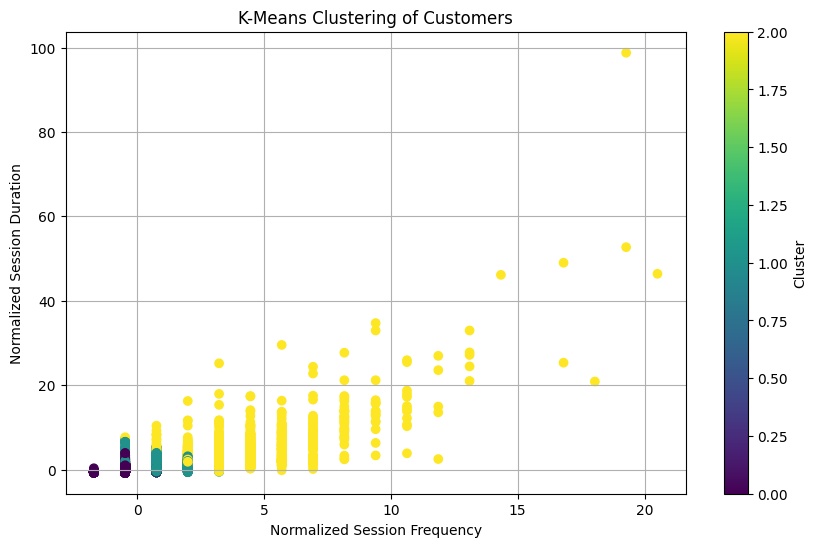

In [33]:
#Visualize the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(normalized_df['norm_frequency'], normalized_df['norm_duration'], c=engagement_metrics['cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Normalized Session Frequency')
plt.ylabel('Normalized Session Duration')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [35]:
#Compute metrics for each cluster
cluster_summary = engagement_metrics.groupby('cluster').agg(
    min_frequency=('sessions_frequency', 'min'),
    max_frequency=('sessions_frequency', 'max'),
    avg_frequency=('sessions_frequency', 'mean'),
    total_frequency=('sessions_frequency', 'sum'),
    
    min_duration=('total_session_duration', 'min'),
    max_duration=('total_session_duration', 'max'),
    avg_duration=('total_session_duration', 'mean'),
    total_duration=('total_session_duration', 'sum'),
    
    min_traffic=('total_traffic', 'min'),
    max_traffic=('total_traffic', 'max'),
    avg_traffic=('total_traffic', 'mean'),
    total_traffic=('total_traffic', 'sum')
).reset_index()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
    cluster  min_frequency  max_frequency  avg_frequency  total_frequency  \
0        0              0              2       1.022365            81596   
1        1              1              4       2.180129            51148   
2        2              1             18       4.397879            15762   

   min_duration  max_duration   avg_duration  total_duration  min_traffic  \
0        7142.0      877385.0  103062.372217    8.225511e+09   33249009.0   
1       18235.0     1480875.0  214945.043093    5.042826e+09  118487293.0   
2       66594.0    18553754.0  655831.755301    2.350501e+09  370420998.0   

    max_traffic   avg_traffic  total_traffic  
0  1.427100e+09  4.950482e+08   3.951029e+13  
1  2.512802e+09  1.113773e+09   2.613024e+13  
2  8.846226e+09  2.285971e+09   8.192919e+12  


Text(0, 0.5, 'Total Traffic (Bytes)')

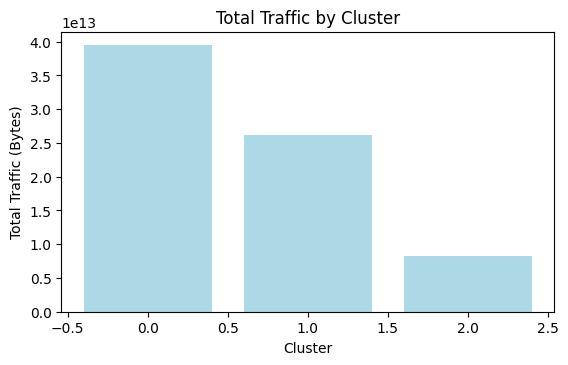

In [36]:
#Visualize the Results
# Set the figure size
plt.figure(figsize=(14, 8))

# Plotting the total traffic for each cluster
plt.subplot(2, 2, 1)
plt.bar(cluster_summary['cluster'], cluster_summary['total_traffic'], color='lightblue')
plt.title('Total Traffic by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Traffic (Bytes)')

Text(0, 0.5, 'Average Duration (ms)')

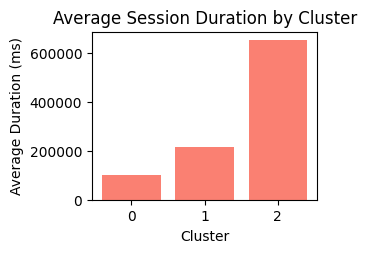

In [37]:

# Plotting the average session duration for each cluster
plt.subplot(2, 2, 2)
plt.bar(cluster_summary['cluster'], cluster_summary['avg_duration'], color='salmon')
plt.title('Average Session Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Duration (ms)')

Text(0, 0.5, 'Average Frequency')

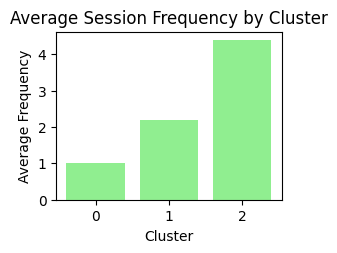

In [38]:
# Plotting the session frequency for each cluster
plt.subplot(2, 2, 3)
plt.bar(cluster_summary['cluster'], cluster_summary['avg_frequency'], color='lightgreen')
plt.title('Average Session Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frequency')

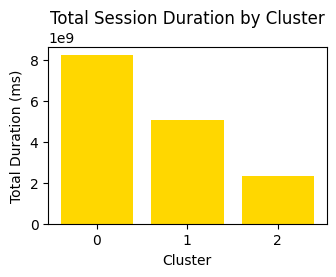

In [39]:

# Plotting the total session duration for each cluster
plt.subplot(2, 2, 4)
plt.bar(cluster_summary['cluster'], cluster_summary['total_duration'], color='gold')
plt.title('Total Session Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Duration (ms)')

# Adjust layout
plt.tight_layout()
plt.show()

In [40]:
app_traffic = df.groupby(['MSISDN/Number', 'Bearer Id']).agg(
    total_download=('HTTP DL (Bytes)', 'sum'),
    total_upload=('HTTP UL (Bytes)', 'sum')
).reset_index()

In [41]:

# Calculate total traffic
app_traffic['total_traffic'] = app_traffic['total_download'] + app_traffic['total_upload']

#Derive Top 10 Most Engaged Users per Application
top_users_per_app = app_traffic.groupby('Bearer Id').apply(lambda x: x.nlargest(10, 'total_traffic')).reset_index(drop=True)

# Display the top users per application
print("\nTop 10 Most Engaged Users per Application:\n", top_users_per_app)


Top 10 Most Engaged Users per Application:
         MSISDN/Number     Bearer Id  total_download  total_upload  \
0        3.360865e+10  6.917538e+18        0.223425        8907.0   
1        3.365905e+10  6.917538e+18        0.000000           0.0   
2        3.366463e+10  6.917538e+18        0.000000           0.0   
3        3.365984e+10  6.917538e+18        0.010204        1840.0   
4        3.365993e+10  6.917538e+18        0.041969        3296.0   
...               ...           ...             ...           ...   
147017   3.365010e+10  1.318654e+19        1.179202      892559.0   
147018   3.360966e+10  1.318654e+19        0.000000           0.0   
147019   3.369956e+10  1.318654e+19     3374.204141    35105285.0   
147020   3.376001e+10  1.318654e+19       11.972453     1430400.0   
147021   3.360856e+10  1.318654e+19        0.000000           0.0   

        total_traffic  
0        8.907223e+03  
1        0.000000e+00  
2        0.000000e+00  
3        1.840010e+03  
4     

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_15120\590472331.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_users_per_app = app_traffic.groupby('Bearer Id').apply(lambda x: x.nlargest(10, 'total_traffic')).reset_index(drop=True)


In [42]:
#Aggregate Total Traffic per Application
app_traffic = df.groupby('Bearer Id').agg(
    total_download=('HTTP DL (Bytes)', 'sum'),
    total_upload=('HTTP UL (Bytes)', 'sum')
).reset_index()

# Calculate total traffic
app_traffic['total_traffic'] = app_traffic['total_download'] + app_traffic['total_upload']

# Step 2: Identify the Top 3 Most Used Applications
top_apps = app_traffic.nlargest(3, 'total_traffic')

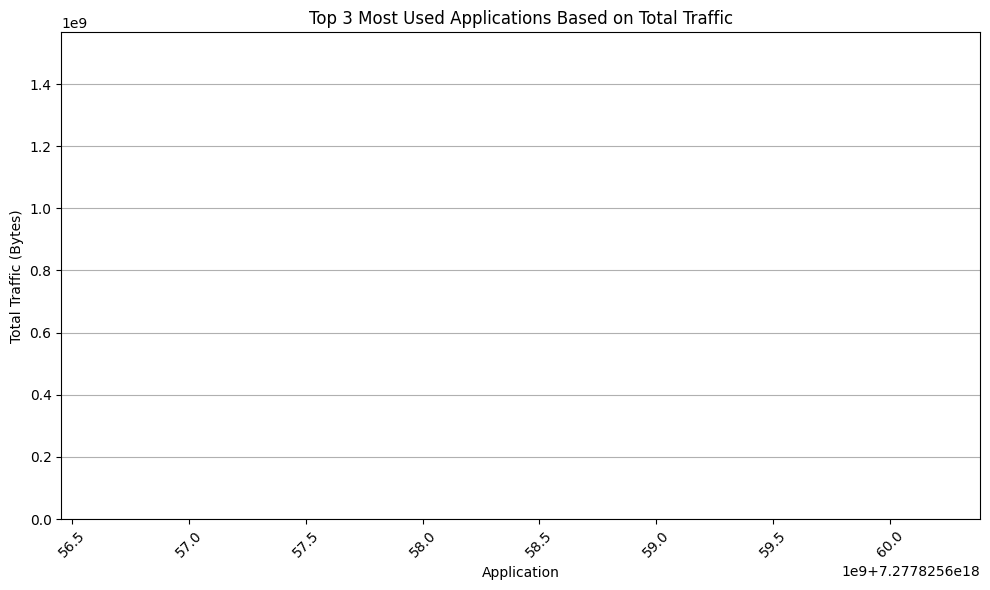

In [43]:
# Plotting
plt.figure(figsize=(10, 6))

# Bar chart for total traffic
plt.bar(top_apps['Bearer Id'], top_apps['total_traffic'], color='skyblue')
plt.title('Top 3 Most Used Applications Based on Total Traffic')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

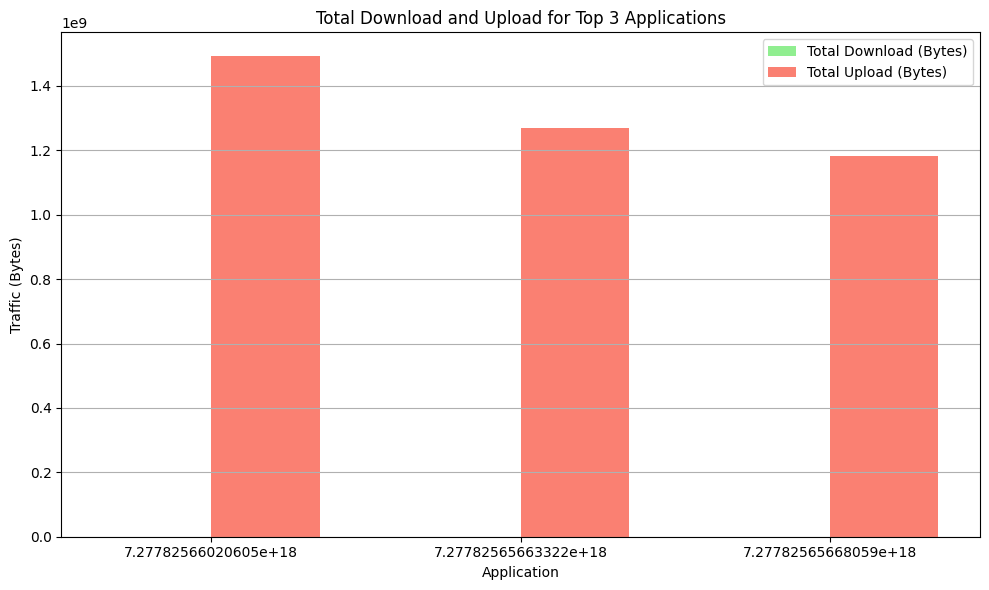

In [44]:

# Optional: Plotting total download and upload separately
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(top_apps))

# Bar chart for total download
plt.bar(index, top_apps['total_download'], bar_width, label='Total Download (Bytes)', color='lightgreen')

# Bar chart for total upload
plt.bar([i + bar_width for i in index], top_apps['total_upload'], bar_width, label='Total Upload (Bytes)', color='salmon')

plt.title('Total Download and Upload for Top 3 Applications')
plt.xlabel('Application')
plt.ylabel('Traffic (Bytes)')
plt.xticks([i + bar_width / 2 for i in index], top_apps['Bearer Id'])
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 1: Aggregate Engagement Metrics per Customer (MSISDN)
engagement_metrics = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),                       # Count of sessions per customer
    total_session_duration=('Dur. (ms)', 'sum')                      # Total duration of sessions in milliseconds
).reset_index()

# Calculate total traffic (download + upload) after aggregation
engagement_metrics['total_traffic'] = df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum().values + \
                                      df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum().values

# Display the aggregated metrics
print(engagement_metrics.head())

   MSISDN/Number  sessions_frequency  total_session_duration  total_traffic
0   3.360100e+10                   1                116720.0   8.786906e+08
1   3.360100e+10                   1                181230.0   1.568596e+08
2   3.360100e+10                   1                134969.0   5.959665e+08
3   3.360101e+10                   1                 49878.0   4.223207e+08
4   3.360101e+10                   2                 37104.0   1.457411e+09


In [47]:

# Normalize Engagement Metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['sessions_frequency', 'total_session_duration', 'total_traffic']])

#Elbow Method to Determine Optimal k
inertia = []
k_values = range(1, 11)  # Test k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

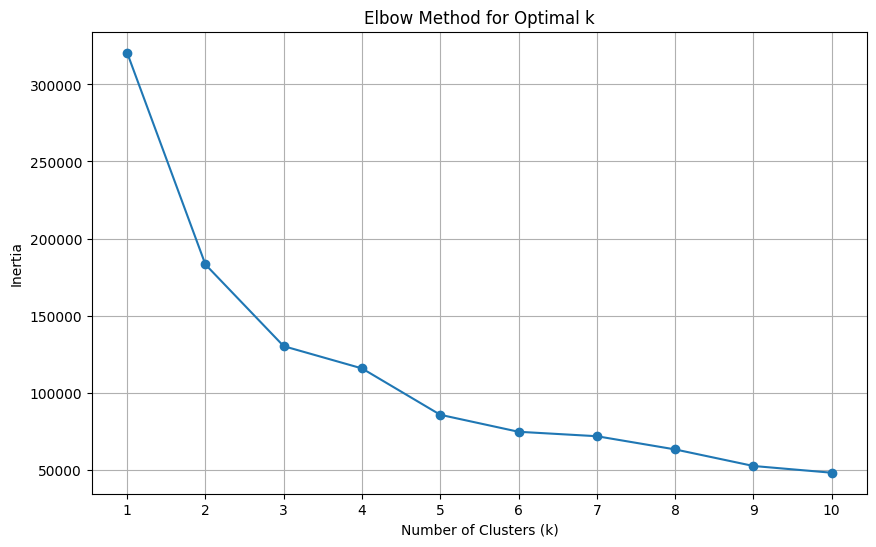

In [48]:

#  Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()